IMPORT FEW LIBRARIES

In [99]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [100]:
from fastai.vision import *

create some folders to save images

we have to run each folder cell once and than run from adding path to make different folders and files

In [ ]:
folder = 'dosa_img'
file = 'dosa.csv'

In [12]:
folder = 'idli_img'
file = 'idli.csv'

In [18]:
folder = 'uttapam_img'
file = 'uttapam.csv'

Adding path 

In [20]:
path = Path('data/dishes')

In [21]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
path.ls()

[WindowsPath('data/dishes/dosa.csv'),
 WindowsPath('data/dishes/dosa_img'),
 WindowsPath('data/dishes/idli.csv'),
 WindowsPath('data/dishes/idli_img'),
 WindowsPath('data/dishes/uttapam.csv'),
 WindowsPath('data/dishes/uttapam_img')]

In [47]:
classes = ['dosa_img','idli_img','uttapam_img']

downloading images

In [24]:
download_images(path/file, dest, max_pics=400)

In [48]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [54]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [55]:
data.classes

['dosa_img', 'idli_img', 'uttapam_img']

displaying images

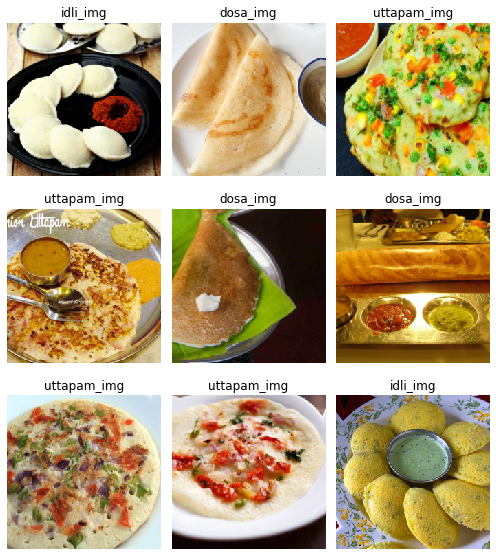

In [56]:
data.show_batch(rows=3, figsize=(7,8))

In [57]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dosa_img', 'idli_img', 'uttapam_img'], 3, 200, 49)

running model on resnet 34

In [58]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.750365,3.605590,0.632653,00:31
1,1.199405,0.805506,0.183674,00:19
2,0.873478,0.729826,0.122449,00:20
3,0.689050,0.704029,0.081633,00:18


saving the model

In [60]:
learn.save('stage-1')

unfreezing the model and running all the layers not using resnet 34

In [61]:
learn.unfreeze()

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


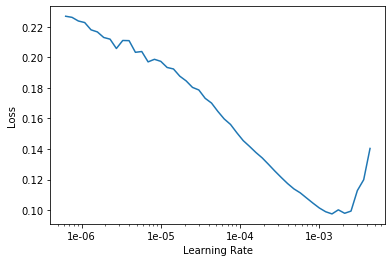

In [63]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.010711,0.923116,0.081633,00:19
1,0.006326,0.867455,0.081633,00:19


In [69]:
learn.save('stage-2')

In [70]:
learn.load('stage-2');

plotting top losses

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

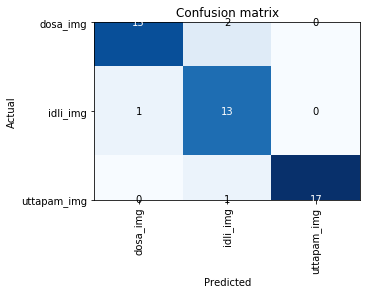

In [72]:
interp.plot_confusion_matrix()

deleting useless images

In [73]:
from fastai.widgets import *

In [74]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [75]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [76]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [77]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [78]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [79]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [80]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

model in production

In [81]:
learn.export()

In [82]:
defaults.device = torch.device('cpu')

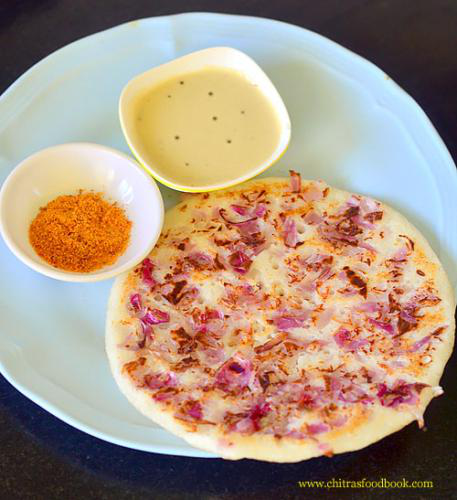

In [96]:
img = open_image(path/'uttapam_img'/'00000021.jpg')
img

In [97]:
learn = load_learner(path)

In [98]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category uttapam_img